## Q. 네이버 영화 랭킹에서 영화 제목과 랭킹 5개 가져와 리스트에 저장해 보자

In [1]:
import urllib.request as ur
import bs4

In [2]:
res = ur.urlopen('https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190116')
web = res.read().decode('euc-kr')
bs = bs4.BeautifulSoup(web, 'html.parser')

In [3]:
table = bs.body.find('tbody')
table

<tbody>
<tr><td class="blank01" colspan="8"></td></tr>
<!-- 예제
				<tr>
					<td class="ac"><img src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_g50.gif" alt="50" width="14" height="13"></td>
					<td class="title"><a href="#">트랜스포머</a></td>
					<td class="ac"><img src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_down_1.gif" alt="down" width="7" height="10"></td>
					<td class="range ac">7</td>
				</tr>
				-->
<tr>
<td class="ac"><img alt="01" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r01.gif" width="14"/></td>
<td class="title">
<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=171539" title="그린 북">그린 북</a>
</div>
</td>
<!-- 평점순일 때 평점 추가하기  -->
<td><div class="point_type_2"><div class="mask" style="width:96.5999984741211%"><img alt="" height="14" src="https://ssl.pstatic.net/imgmovie/2007/img/common/point_type_2_bg_on.gif" width="79"/></div></div></td>
<td class="point">9.66</td>
<td class="ac"><a class="txt_link" hre

In [4]:
movie_name = []
for n in range(5):
    movie_name.append(table.find_all('td',class_ = "title")[n].getText().strip('\n'))
movie_name

['그린 북', '보헤미안 랩소디', '폴란드로 간 아이들', '헌터 킬러', '스파이더맨: 뉴 유니버스']

In [5]:
movie_score = []
for n in range(5):
    movie_score.append(table.find_all('td',class_='point')[n].getText())
movie_score

['9.66', '9.48', '9.42', '9.40', '9.26']

## 표로 만들어 보기

In [6]:
import pandas as pd
d = {"랭킹":[1,2,3,4,5], "영화 제목":movie_name,"영화 평점":movie_score}
movie_info = pd.DataFrame(data=d)

In [7]:
movie_info

,랭킹,영화 제목,영화 평점
0,1,그린 북,9.66
1,2,보헤미안 랩소디,9.48
2,3,폴란드로 간 아이들,9.42
3,4,헌터 킬러,9.40
4,5,스파이더맨: 뉴 유니버스,9.26


In [8]:
movie_info.set_index("랭킹")

,영화 제목,영화 평점
랭킹,,
1,그린 북,9.66
2,보헤미안 랩소디,9.48
3,폴란드로 간 아이들,9.42
4,헌터 킬러,9.40
5,스파이더맨: 뉴 유니버스,9.26


# 이미지 가져와서 저장하기

In [9]:
res2 = ur.urlopen('https://naver.com')
web2 = res2.read().decode('utf-8')
bs2 = bs4.BeautifulSoup(web2, 'html.parser')
img_path = bs2.find_all('span',class_='td_mw')
src = img_path[0].find("img")['src']
src

'https://s.pstatic.net/static/www/mobile/edit/2019/0118/imgedit_37685205732426747.jpeg'

In [10]:
image = ur.urlopen(src).read()
f = open("이미지.jpg","wb")
f.write(image)
f.close()

## 이미지 출력하기

In [11]:
#!pip install pillow

In [12]:
from PIL import Image
a = Image.open("이미지.jpg")
a.show()

In [13]:
from matplotlib.pyplot import imshow

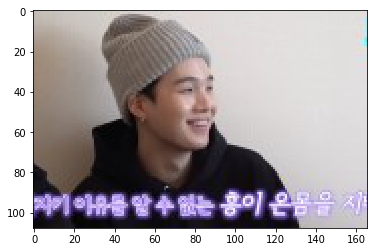

In [14]:
imshow(a)

## Q. 영화 평점 랭킹 5위 안에 있는 영화들의 이미지를 다운받아 출력해 보자!

In [15]:
res = ur.urlopen('https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190116')
web = res.read().decode('euc-kr')
bs = bs4.BeautifulSoup(web, 'html.parser')

In [16]:
qes=bs.find_all('div' ,class_='tit5')
list1=[]
for i in range(5):
    list1.append('https://movie.naver.com'+qes[i].find('a')['href'])

In [17]:
list1

['https://movie.naver.com/movie/bi/mi/basic.nhn?code=171539',
 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=156464',
 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=178434',
 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=92125',
 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=171725']

In [18]:
for i in range(5):
    res = ur.urlopen(list1[i])
    web = res.read().decode('utf-8')
    bs = bs4.BeautifulSoup(web, 'html.parser')
    qes=bs.find_all('div',class_='poster')
    src=qes[1].find('img')['src']
    image = ur.urlopen(src).read()
    f = open(str(i)+".jpg","wb")
    f.write(image)
    f.close()

In [19]:
for i in range(5):
    Image.open(str(i)+".jpg").show()

In [44]:
res = ur.urlopen('https://dimigo.in')
web = res.read().decode('utf-8')
bs = bs4.BeautifulSoup(web, 'html.parser')
bs.find_all('div',class_='meal-item')

[]